In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from os import *
import librosa
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Flatten
import tensorflow.keras.backend as K
from tensorflow.keras.layers.experimental import preprocessing
from keras.utils import to_categorical

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import matplotlib.pyplot as plt

In [5]:
en2 = pd.read_csv('/content/gdrive/My Drive/cv-valid-train.csv', delimiter=',')

In [6]:
del en2['gender']

In [7]:
en2

,filename,text,up_votes,down_votes,age,accent,duration
0,cv-valid-train/sample-000000.mp3,learn to recognize omens and follow them the o...,1,0,NaN,NaN,NaN
1,cv-valid-train/sample-000001.mp3,everything in the universe evolved he said,1,0,NaN,NaN,NaN
2,cv-valid-train/sample-000002.mp3,you came so that you could learn about your dr...,1,0,NaN,NaN,NaN
3,cv-valid-train/sample-000003.mp3,so now i fear nothing because it was those ome...,1,0,NaN,NaN,NaN
4,cv-valid-train/sample-000004.mp3,if you start your emails with greetings let me...,3,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3996,cv-valid-train/sample-003996.mp3,it was faintly marked with transverse stripes ...,4,0,sixties,us,NaN
3997,cv-valid-train/sample-003997.mp3,i don't much like change he said,1,0,NaN,NaN,NaN
3998,cv-valid-train/sample-003998.mp3,a large portion of the cylinder had been uncov...,3,0,NaN,NaN,NaN
3999,cv-valid-train/sample-003999.mp3,she carefully removed the evidence from its pa...,1,0,twenties,england,NaN


In [8]:
Y = []
for i in range(0,4001):
    Y.append(en2.loc[i, 'text'])

In [9]:
Y

['learn to recognize omens and follow them the old king had said',
 'everything in the universe evolved he said',
 'you came so that you could learn about your dreams said the old woman',
 'so now i fear nothing because it was those omens that brought you to me',
 'if you start your emails with greetings let me be the first to welcome you to earth',
 'a shepherd may like to travel but he should never forget about his sheep',
 'night fell and an assortment of fighting men and merchants entered and exited the tent',
 'i heard a faint movement under my feet',
 'put jackie right on the staff',
 'when he speaks in our language i can interpret what he has said',
 'you must not let up even after having come so far he continued',
 'if you have to wait until the war is over then wait',
 'my wife pointed out to me the brightness of the red green and yellow signal lights',
 "but he had found a guide and didn't want to miss out on an opportunity",
 'as they began to decorate the hallway a silhouet

In [20]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)




In [21]:
import os
import gensim
# Set file names for train and test data
test_data_dir = os.path.join(gensim.__path__[0], 'test', 'test_data')
lee_train_file = os.path.join(test_data_dir, 'lee_background.cor')
lee_test_file = os.path.join(test_data_dir, 'lee.cor')

In [22]:
import smart_open

def read_corpus(fname, tokens_only=False):
    with smart_open.open(fname, encoding="iso-8859-1") as f:
        for i, line in enumerate(f):
            tokens = gensim.utils.simple_preprocess(line)
            if tokens_only:
                yield tokens
            else:
                # For training data, add tags
                yield gensim.models.doc2vec.TaggedDocument(tokens, [i])

train_corpus = list(read_corpus(lee_train_file))
test_corpus = list(read_corpus(lee_test_file, tokens_only=True))

In [13]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=50, min_count=2, epochs=40)

2020-10-12 17:40:26,814 : WARNING : consider setting layer size to a multiple of 4 for greater performance


In [14]:
model.build_vocab(train_corpus)

2020-10-12 17:40:26,834 : INFO : collecting all words and their counts
2020-10-12 17:40:26,835 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2020-10-12 17:40:26,853 : INFO : collected 6981 word types and 300 unique tags from a corpus of 300 examples and 58152 words
2020-10-12 17:40:26,855 : INFO : Loading a fresh vocabulary
2020-10-12 17:40:27,010 : INFO : effective_min_count=2 retains 3955 unique words (56% of original 6981, drops 3026)
2020-10-12 17:40:27,011 : INFO : effective_min_count=2 leaves 55126 word corpus (94% of original 58152, drops 3026)
2020-10-12 17:40:27,025 : INFO : deleting the raw counts dictionary of 6981 items
2020-10-12 17:40:27,028 : INFO : sample=0.001 downsamples 46 most-common words
2020-10-12 17:40:27,029 : INFO : downsampling leaves estimated 42390 word corpus (76.9% of prior 55126)
2020-10-12 17:40:27,044 : INFO : estimated required memory for 3955 words and 50 dimensions: 3619500 bytes
2020-10-12 17:40:27,045 : INFO : res

In [15]:
model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)

2020-10-12 17:40:27,941 : INFO : training model with 3 workers on 3955 vocabulary and 50 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2020-10-12 17:40:28,065 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-10-12 17:40:28,070 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-10-12 17:40:28,074 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-10-12 17:40:28,075 : INFO : EPOCH - 1 : training on 58152 raw words (42739 effective words) took 0.1s, 341865 effective words/s
2020-10-12 17:40:28,180 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-10-12 17:40:28,195 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-10-12 17:40:28,202 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-10-12 17:40:28,203 : INFO : EPOCH - 2 : training on 58152 raw words (42653 effective words) took 0.1s, 351454 effective words/s
2020-10-12 17:40:28,305 : INFO : worker 

In [16]:
Y[0]

'learn to recognize omens and follow them the old king had said'

In [17]:
Y[0].split()

['learn',
 'to',
 'recognize',
 'omens',
 'and',
 'follow',
 'them',
 'the',
 'old',
 'king',
 'had',
 'said']

In [23]:
len(model.infer_vector(Y[2]))

50

In [ ]:
maximum = 0

In [24]:
element_from_Y = Y[0].split()
vector = model.infer_vector(element_from_Y)
vector = vector[np.newaxis, :]
text = vector

In [ ]:
text

In [25]:
for i in range(1, 4001):
    element_from_Y = Y[i].split()
    vector = model.infer_vector(element_from_Y)
    vector = vector[np.newaxis, :]
    text = np.vstack((text, vector))


In [26]:
text

array([[ 0.05018945, -0.24415407, -0.22478496, ...,  0.10894994,
         0.33346802, -0.47969866],
       [-0.10800226, -0.01114176, -0.04148346, ...,  0.01723708,
         0.03657657,  0.1958733 ],
       [ 0.21095268, -0.22486393, -0.4917504 , ...,  0.07195988,
         0.40375808, -0.31204957],
       ...,
       [-0.13125624, -0.04788989, -0.02060106, ..., -0.01160607,
        -0.05395839, -0.02673681],
       [-0.0871967 , -0.05740685, -0.27651712, ...,  0.28262874,
         0.26395375,  0.02049628],
       [-0.04927671, -0.07268066, -0.12010183, ...,  0.1519459 ,
         0.03706621, -0.05927941]], dtype=float32)

In [27]:
text.shape

(4001, 50)

In [28]:
path = '/content/gdrive/My Drive/re_eng'
soundlist = sorted(listdir(path))

In [29]:
Y, sr = librosa.load('/content/gdrive/My Drive/re_eng/sample-000000.wav')
loaded_sound_1 =  np.array((librosa.feature.mfcc(Y, sr=sr, S=None, n_mfcc=20)))


In [30]:
len(loaded_sound_1[1])

177

In [31]:
def wav2mfcc(file_path, n_mfcc=20, max_len=300):
    wave, sr = librosa.load(file_path, mono=True, sr=None)
    wave = wave[::3]
    mfcc = librosa.feature.mfcc(wave, sr=16000, n_mfcc=n_mfcc)

    # If maximum length exceeds mfcc lengths then pad the remaining ones
    if (max_len > mfcc.shape[1]):
        pad_width = max_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')

    # Else cutoff the remaining parts
    else:
        mfcc = mfcc[:, :max_len]
        
    return mfcc

In [32]:
b = '/content/gdrive/My Drive/re_eng'
X = []
i = 0 

In [33]:
l_sound = wav2mfcc(b+'/'+soundlist[0], 20, 300)
l_sound = l_sound[np.newaxis, :, :]
X = l_sound

In [34]:
X

array([[[-6.00549700e+02, -5.56038712e+02, -5.09787284e+02, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 3.43385936e+01,  6.50643381e+01,  6.98438745e+01, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 2.17308472e+01,  2.02548106e+01,  4.78122915e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [-2.59548042e-01,  1.92445974e+00,  1.54990529e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 2.48048250e+00,  9.12333339e+00,  5.66340333e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 1.14943983e+00,  5.06605855e+00,  5.29347972e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]])

In [35]:
for file in soundlist[1:]:
    a = str(file)
    l_sound = wav2mfcc(b+'/'+a, 20, 300)
    l_sound = l_sound[np.newaxis, :, :]
    X = np.vstack((X, l_sound))
    i = i+1
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [36]:
text.shape

(4001, 50)

In [37]:
X.shape

(4001, 20, 300)

In [53]:
X_train, X_test, text_train, text_test = train_test_split(X, text, test_size=0.3, random_state=42)

In [54]:
print(X_train.shape)
print(X_test.shape)
print(text_train.shape)
print(text_test.shape)

(2800, 20, 300)
(1201, 20, 300)
(2800, 50)
(1201, 50)


In [57]:
modelR = Sequential()
modelR.add
modelR.add(LSTM(units=300 ,  batch_input_shape = (1,20,300), return_sequences=True))
modelR.add(Dropout(0.2))
modelR.add(Flatten())
modelR.add(Dropout(0.2))
modelR.add(Dense(units=50))

modelR.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
modelR.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (1, 20, 300)              721200    
_________________________________________________________________
dropout_5 (Dropout)          (1, 20, 300)              0         
_________________________________________________________________
flatten_2 (Flatten)          (1, 6000)                 0         
_________________________________________________________________
dropout_6 (Dropout)          (1, 6000)                 0         
_________________________________________________________________
dense_2 (Dense)              (1, 50)                   300050    
Total params: 1,021,250
Trainable params: 1,021,250
Non-trainable params: 0
_________________________________________________________________


In [58]:
history = modelR.fit(X_train, text_train, epochs=300, batch_size= 2800, validation_batch_size=1201, validation_data=(X_test, text_test))

Epoch 1/300


2020-10-12 19:51:48,827 : WARNING : Model was constructed with shape (1, 20, 300) for input Tensor("lstm_3_input:0", shape=(1, 20, 300), dtype=float32), but it was called on an input with incompatible shape (2800, 20, 300).


2020-10-12 19:51:49,384 : WARNING : Model was constructed with shape (1, 20, 300) for input Tensor("lstm_3_input:0", shape=(1, 20, 300), dtype=float32), but it was called on an input with incompatible shape (2800, 20, 300).


1/1 [==============================] - ETA: 0s - loss: 0.5019 - accuracy: 0.0186WARNING:tensorflow:Model was constructed with shape (1, 20, 300) for input Tensor("lstm_3_input:0", shape=(1, 20, 300), dtype=float32), but it was called on an input with incompatible shape (1201, 20, 300).


2020-10-12 19:51:55,119 : WARNING : Model was constructed with shape (1, 20, 300) for input Tensor("lstm_3_input:0", shape=(1, 20, 300), dtype=float32), but it was called on an input with incompatible shape (1201, 20, 300).


1/1 [==============================] - 1s 1s/step - loss: 0.5019 - accuracy: 0.0186 - val_loss: 0.3489 - val_accuracy: 0.0516
Epoch 2/300
1/1 [==============================] - 1s 779ms/step - loss: 0.4875 - accuracy: 0.0421 - val_loss: 0.2439 - val_accuracy: 0.0525
Epoch 3/300
1/1 [==============================] - 1s 799ms/step - loss: 0.3543 - accuracy: 0.0436 - val_loss: 0.2178 - val_accuracy: 0.0391
Epoch 4/300
1/1 [==============================] - 1s 770ms/step - loss: 0.3088 - accuracy: 0.0339 - val_loss: 0.2072 - val_accuracy: 0.0258
Epoch 5/300
1/1 [==============================] - 1s 771ms/step - loss: 0.2840 - accuracy: 0.0296 - val_loss: 0.1907 - val_accuracy: 0.0250
Epoch 6/300
1/1 [==============================] - 1s 768ms/step - loss: 0.2568 - accuracy: 0.0279 - val_loss: 0.1729 - val_accuracy: 0.0291
Epoch 7/300
1/1 [==============================] - 1s 778ms/step - loss: 0.2285 - accuracy: 0.0386 - val_loss: 0.1600 - val_accuracy: 0.0408
Epoch 8/300
1/1 [===========

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


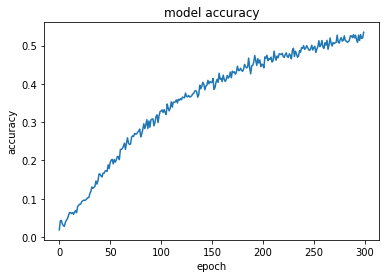

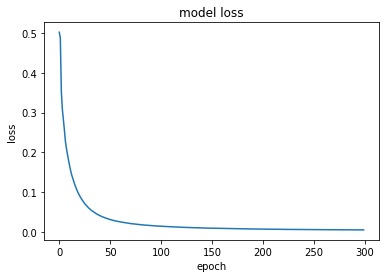

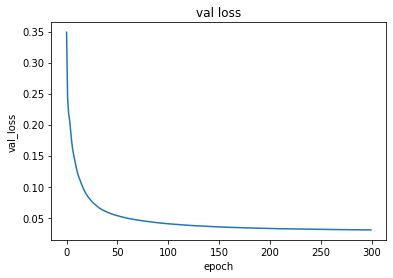

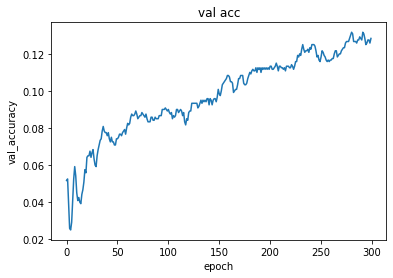

In [59]:
print(history.history.keys()) 
plt.plot(history.history['accuracy']) 
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
plt.plot(history.history['loss']) 
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
plt.plot(history.history['val_loss']) 
plt.title('val loss')
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.show()
plt.plot(history.history['val_accuracy']) 
plt.title('val acc')
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.show()

In [71]:
l_sound = wav2mfcc(b+'/'+soundlist[1], 20, 300)
l_sound = l_sound[np.newaxis, :, :]

In [72]:
pr_vec = modelR.predict(l_sound)
modelR.predict(l_sound)

array([[-0.10452261, -0.01342254, -0.02616299,  0.02392217,  0.19233212,
        -0.2925265 ,  0.02664003,  0.06189104,  0.1539435 ,  0.18258145,
        -0.19316629, -0.06264777, -0.09311958,  0.10864045,  0.04086531,
         0.10106227, -0.11141185, -0.0177407 ,  0.04256094, -0.00912639,
         0.23276931,  0.2534377 , -0.02994015, -0.14385283,  0.02234964,
         0.20701286,  0.12324407, -0.03130278,  0.03332168, -0.03202903,
         0.01910312, -0.19430721, -0.09356172, -0.00084982,  0.02239756,
        -0.10204819, -0.04816896,  0.05510975,  0.07706105,  0.20178741,
        -0.00159436,  0.08259678,  0.14328861,  0.02214809,  0.07678687,
         0.05537795, -0.12043011,  0.04433088, -0.00100361,  0.11783764]],
      dtype=float32)

In [73]:
text[1]

array([-0.10800226, -0.01114176, -0.04148346,  0.02142872,  0.23103386,
       -0.294518  ,  0.02077409,  0.08168186,  0.11223833,  0.20466635,
       -0.20407924, -0.08282874, -0.11296343,  0.1512844 ,  0.02027182,
        0.10556787, -0.09061632, -0.0003398 ,  0.03600631,  0.02699714,
        0.25135016,  0.25560138, -0.00537576, -0.17706683,  0.0241589 ,
        0.21742775,  0.08641231, -0.06061738, -0.01175358, -0.02328724,
        0.03299474, -0.19263504, -0.13826281,  0.01727255,  0.00543025,
       -0.07996631, -0.01182969,  0.10256241,  0.07405075,  0.20779356,
       -0.02724226,  0.02608191,  0.11182893,  0.05248057,  0.08941002,
        0.02686662, -0.13670637,  0.01723708,  0.03657657,  0.1958733 ],
      dtype=float32)

In [ ]:
Y[2]

In [ ]:
model.syn1(pr_vec)
